In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/IoT-Security-Dataset.csv')

In [5]:
df.head()

,PostId,Sentence,Security,Cleaned Sentence
0,53090037,It seems that nothing that I do allows buildro...,0,it seems that nothing that i do allows buildro...
1,17158394,I've gone so far as to delete ~/.config/QtProj...,0,i've gone so far as to delete ~/.config/qtproj...
2,56452069,So I'm following this custom module guide to d...,0,so i'm following this custom module guide to d...
3,42104944,How can I solve these problems?,0,how can i solve these problems?
4,2143270,In all cases check out compiler availability (...,0,in all cases check out compiler availability (...


In [6]:
df.drop(['PostId','Sentence'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7147 entries, 0 to 7146
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Security          7147 non-null   int64 
 1   Cleaned Sentence  7147 non-null   object
dtypes: int64(1), object(1)
memory usage: 111.8+ KB


In [8]:
df.describe()

,Security
count,7147.000000
mean,0.034980
std,0.183741
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
df.shape

(7147, 2)

In [10]:
df.head()

,Security,Cleaned Sentence
0,0,it seems that nothing that i do allows buildro...
1,0,i've gone so far as to delete ~/.config/qtproj...
2,0,so i'm following this custom module guide to d...
3,0,how can i solve these problems?
4,0,in all cases check out compiler availability (...


In [11]:
df.drop_duplicates(inplace=True)
df.isna().sum()

Security            0
Cleaned Sentence    0
dtype: int64

In [12]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Download NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['Cleaned Sentence'] = df['Cleaned Sentence'].apply(preprocess_text)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X = tfidf.fit_transform(df['Cleaned Sentence'])

# Extract the labels
y = df['Security']

# Apply SMOTE before splitting the data into training and testing sets
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the new class distribution
print('Original dataset shape:', y.value_counts())
print('Resampled dataset shape:', pd.Series(y_resampled).value_counts())

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Original dataset shape: Security
0    6874
1     250
Name: count, dtype: int64
Resampled dataset shape: Security
0    6874
1    6874
Name: count, dtype: int64


# **Logistic Regression**

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1382
           1       0.98      1.00      0.99      1368

    accuracy                           0.99      2750
   macro avg       0.99      0.99      0.99      2750
weighted avg       0.99      0.99      0.99      2750



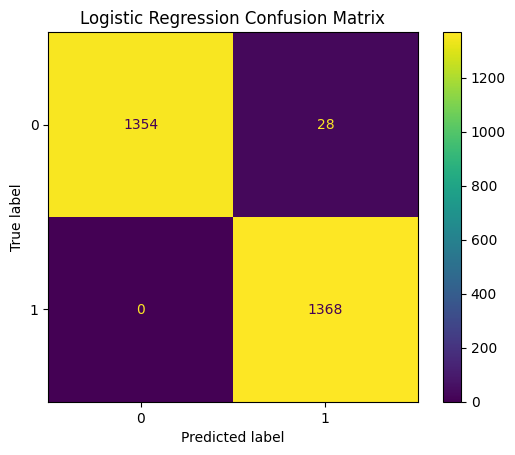

In [14]:
# Initialize and train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
log_y_pred = log_model.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print(classification_report(y_test, log_y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, log_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# **Random Forest**

Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1382
           1       1.00      0.99      1.00      1368

    accuracy                           1.00      2750
   macro avg       1.00      1.00      1.00      2750
weighted avg       1.00      1.00      1.00      2750



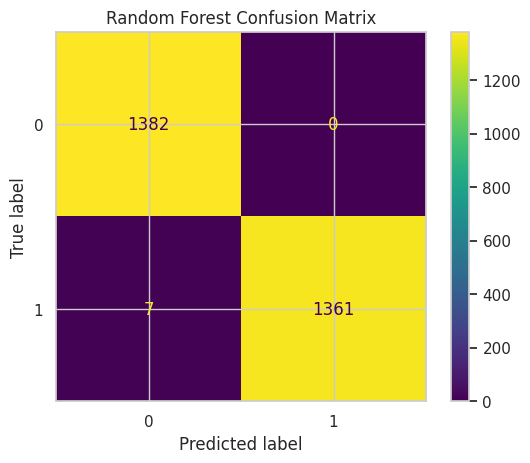

In [27]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest:")
print(classification_report(y_test, rf_y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

# **Gradient Boosting Machine**

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1382
           1       0.98      0.88      0.93      1368

    accuracy                           0.94      2750
   macro avg       0.94      0.94      0.94      2750
weighted avg       0.94      0.94      0.94      2750



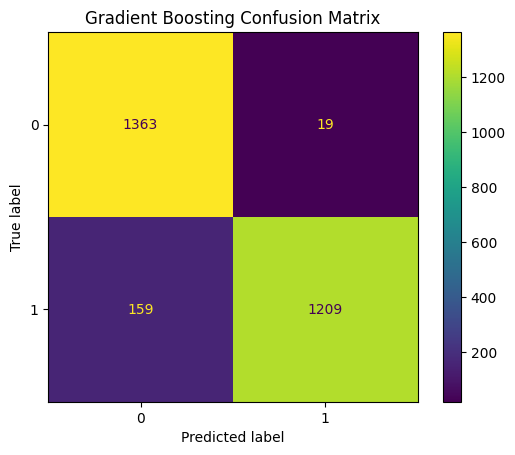

In [16]:
# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting:")
print(classification_report(y_test, gb_y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, gb_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


# **Support Vector Machine (SVM)**

Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1382
           1       1.00      1.00      1.00      1368

    accuracy                           1.00      2750
   macro avg       1.00      1.00      1.00      2750
weighted avg       1.00      1.00      1.00      2750



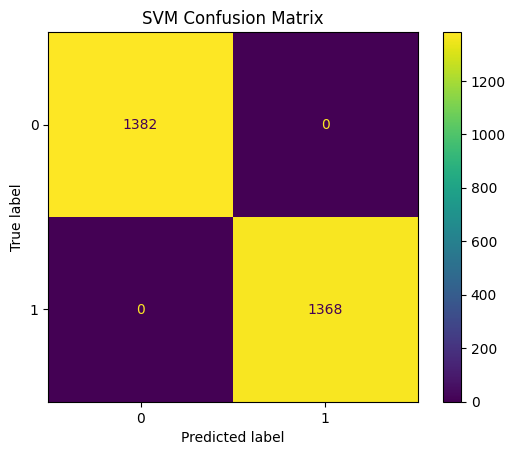

In [17]:
# Initialize and train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine (SVM):")
print(classification_report(y_test, svm_y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, svm_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVM Confusion Matrix')
plt.show()


# **Model Comparison**

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store the metrics for each model
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM'],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)

metrics['Accuracy'].append(accuracy_score(y_test, log_y_pred))
metrics['Precision'].append(precision_score(y_test, log_y_pred))
metrics['Recall'].append(recall_score(y_test, log_y_pred))
metrics['F1 Score'].append(f1_score(y_test, log_y_pred))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

metrics['Accuracy'].append(accuracy_score(y_test, rf_y_pred))
metrics['Precision'].append(precision_score(y_test, rf_y_pred))
metrics['Recall'].append(recall_score(y_test, rf_y_pred))
metrics['F1 Score'].append(f1_score(y_test, rf_y_pred))

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

metrics['Accuracy'].append(accuracy_score(y_test, gb_y_pred))
metrics['Precision'].append(precision_score(y_test, gb_y_pred))
metrics['Recall'].append(recall_score(y_test, gb_y_pred))
metrics['F1 Score'].append(f1_score(y_test, gb_y_pred))

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

metrics['Accuracy'].append(accuracy_score(y_test, svm_y_pred))
metrics['Precision'].append(precision_score(y_test, svm_y_pred))
metrics['Recall'].append(recall_score(y_test, svm_y_pred))
metrics['F1 Score'].append(f1_score(y_test, svm_y_pred))

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)


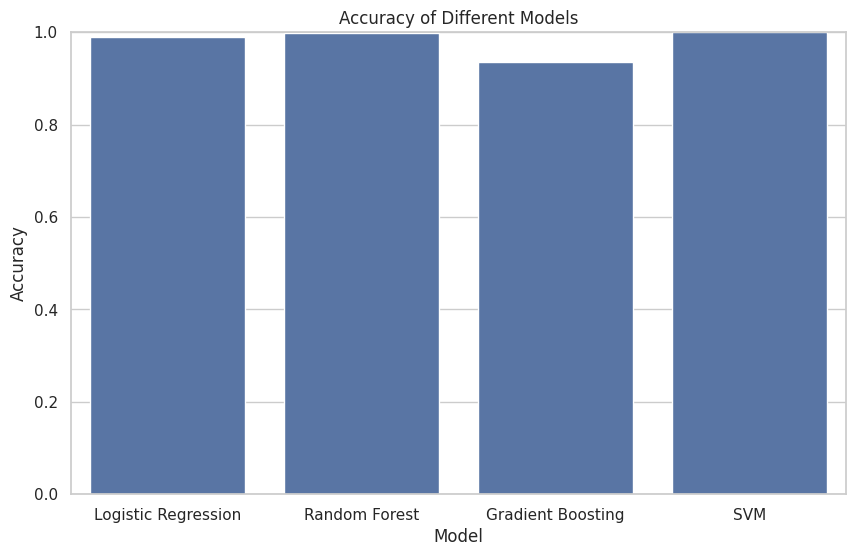

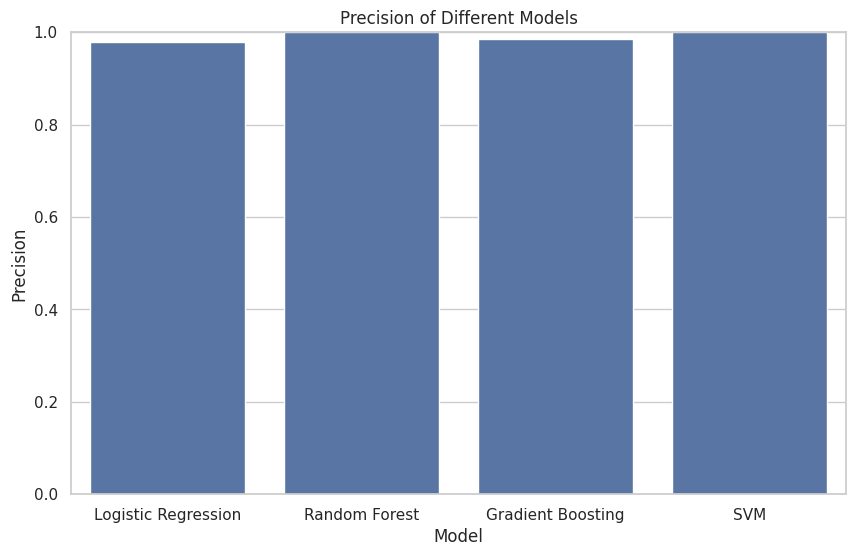

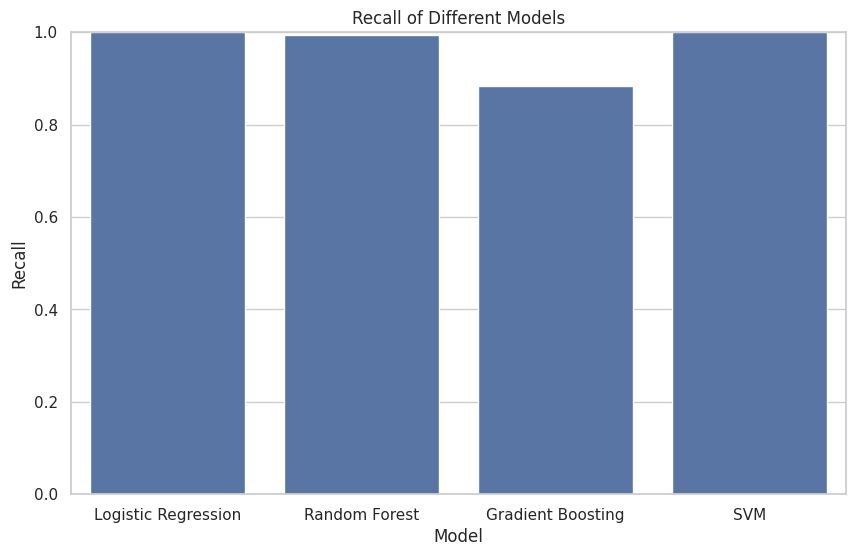

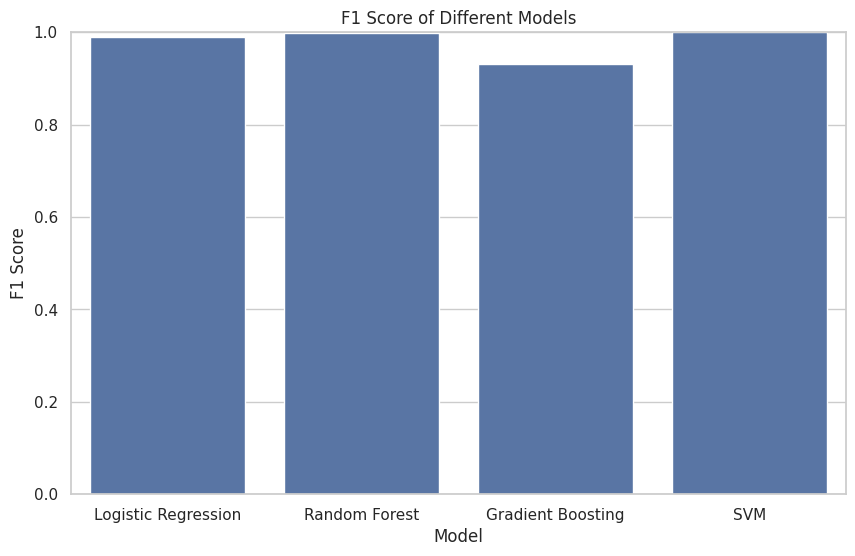

In [19]:
# Set the style
sns.set(style="whitegrid")

# Plot Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.show()

# Plot Precision
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Precision of Different Models')
plt.ylim(0, 1)
plt.show()

# Plot Recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Recall of Different Models')
plt.ylim(0, 1)
plt.show()

# Plot F1 Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=metrics_df)
plt.title('F1 Score of Different Models')
plt.ylim(0, 1)
plt.show()


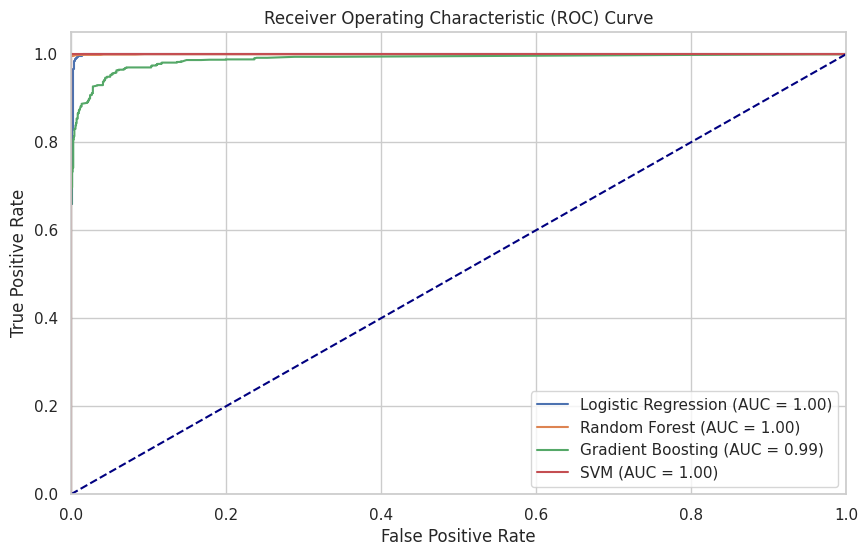

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC Curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 6))

    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:  # for models without predict_proba
            y_pred_proba = model.decision_function(X_test)
            y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

# Train models and plot ROC curves
for model_name, model in models.items():
    model.fit(X_train, y_train)

plot_roc_curve(models, X_test, y_test)


# **ANALYSIS**

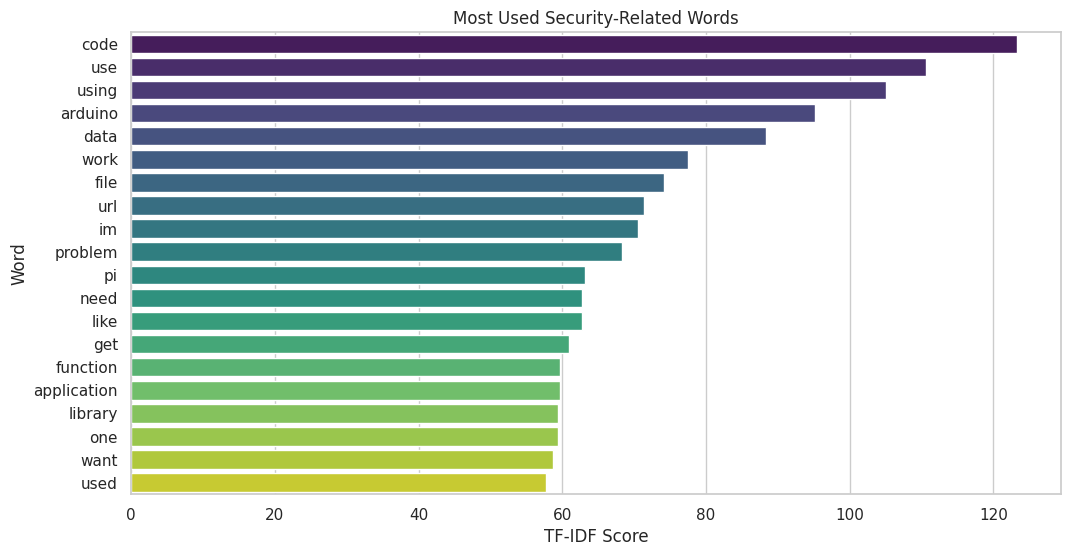

In [22]:
from wordcloud import WordCloud
from collections import Counter
# Get the feature names (words) from the TF-IDF vectorizer
words = tfidf.get_feature_names_out()

# Sum the TF-IDF scores for each word across all documents
word_scores = np.array(X.sum(axis=0)).flatten()

# Create a DataFrame for word scores
word_scores_df = pd.DataFrame({'word': words, 'score': word_scores})

# Get the top 20 most frequent words
top_words_df = word_scores_df.sort_values(by='score', ascending=False).head(20)

# Plot the count plot
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='word', data=top_words_df, palette="viridis")
plt.title('Most Used Security-Related Words')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()


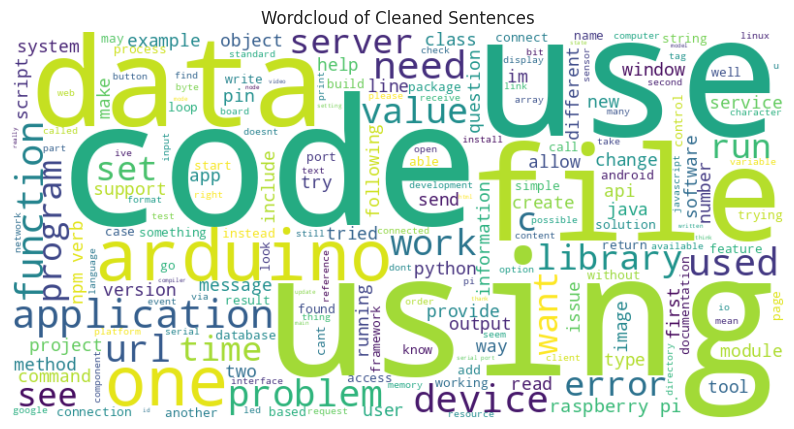

In [23]:
# Join all sentences into a single string
all_text = ' '.join(df['Cleaned Sentence'])

# Create a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Cleaned Sentences')
plt.show()


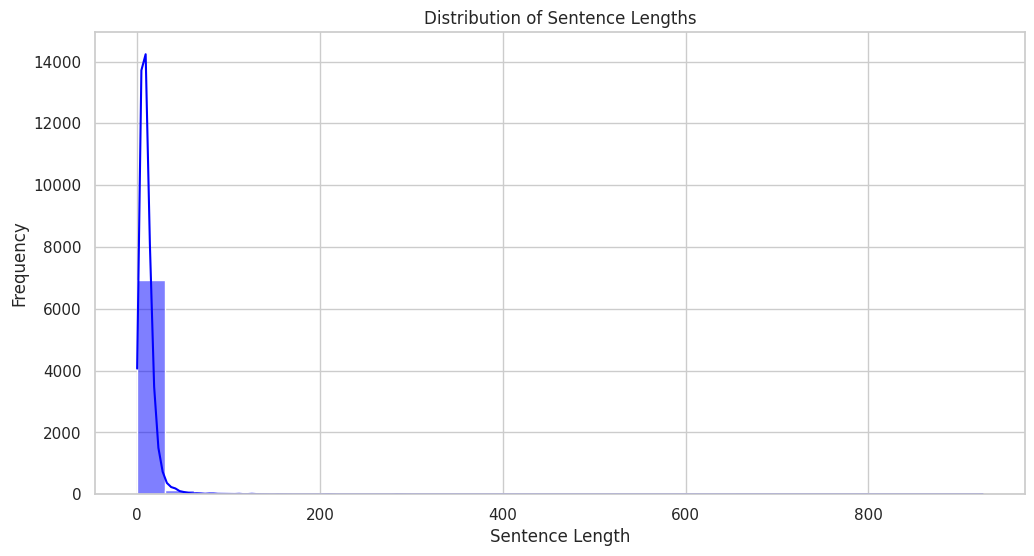

In [24]:
# Calculate the length of each sentence
df['Sentence Length'] = df['Cleaned Sentence'].apply(lambda x: len(x.split()))

# Plot the distribution of sentence lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['Sentence Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()


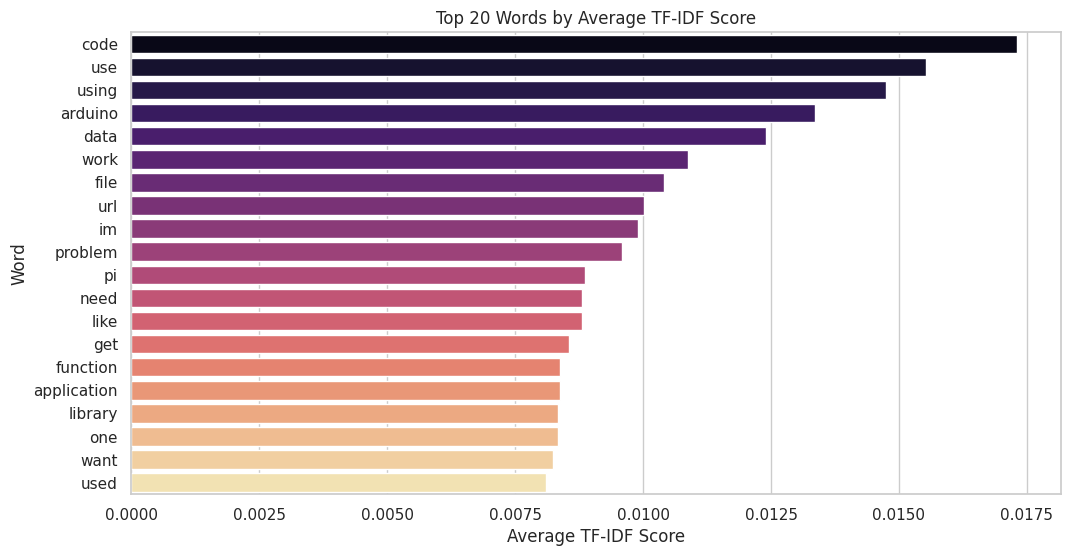

In [25]:
# Get the average TF-IDF score for each word
avg_word_scores_df = word_scores_df.copy()
avg_word_scores_df['avg_score'] = avg_word_scores_df['score'] / X.shape[0]

# Get the top 20 words by average score
top_avg_words_df = avg_word_scores_df.sort_values(by='avg_score', ascending=False).head(20)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_score', y='word', data=top_avg_words_df, palette="magma")
plt.title('Top 20 Words by Average TF-IDF Score')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Word')
plt.show()

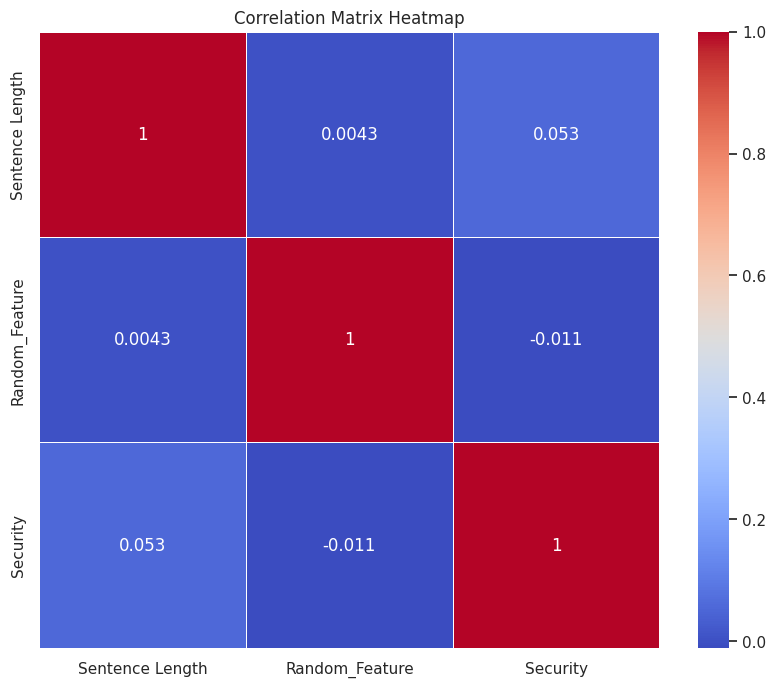

In [26]:
# Example: Assuming the dataset has some numerical features
# Add a small random numerical feature for demonstration
df['Random_Feature'] = np.random.rand(len(df))

# Calculate the correlation matrix
correlation_matrix = df[['Sentence Length', 'Random_Feature', 'Security']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [28]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [31]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
rf_model_loaded = joblib.load('random_forest_model.pkl')
# Define a function to preprocess the input text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-z]\s+', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Define a function to predict if a question is security-related
def predict_security(question, model, vectorizer):
    # Preprocess the question
    clean_question = preprocess_text(question)
    # Transform the question using the vectorizer
    question_tfidf = vectorizer.transform([clean_question])
    # Make the prediction
    prediction = model.predict(question_tfidf)
    return prediction[0]

# Load the TF-IDF vectorizer (it should be saved during model training)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectorizer.fit(df['Cleaned Sentence'])

# Example usage
user_question = "How to secure apps and webs from cyber attack using Iot ?"
prediction = predict_security(user_question, rf_model_loaded, tfidf_vectorizer)
print("Prediction (0 for security-related, 1 for not):", prediction)


Prediction (0 for security-related, 1 for not): 0
